In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import numpy as np
from helpers_train import load_train_dataset, train_data_preprocessing

In [34]:
folder_path = "processed_data/train"
data_df = load_train_dataset(folder_path)
data_df.sample(10)

Loading Data:   0%|          | 0/5 [00:00<?, ?file/s]

Loading Data: 100%|██████████| 5/5 [00:00<00:00, 12.71file/s]


,ax,ay,az,wx,wy,wz,angleX,angleY,angleZ,label
33889,0.135,0.294,-0.955,-0.977,0.427,0.671,162.422,-8.421,-111.709,lying
35077,0.133,0.287,-0.954,-0.671,0.183,0.549,162.861,-8.196,-115.269,lying
4351,-0.716,0.149,-0.666,-29.297,29.541,-39.917,170.403,46.181,73.367,sitting
15449,0.002,0.298,-0.612,-134.949,303.589,-64.331,-174.111,25.714,-86.677,climbing
6478,-0.596,0.09,-0.811,-7.69,0.122,-1.77,172.425,36.854,64.232,sitting
30746,-0.811,0.129,-0.573,0.427,-0.549,0.732,166.399,53.86,-73.504,sitting
41027,0.133,0.29,-0.95,-0.671,-0.122,0.793,163.109,-7.57,-119.103,lying
28201,-0.028,0.088,0.004,-94.36,-99.548,122.681,169.398,18.94,93.79,running
26692,-0.468,-0.085,-3.25,11.536,200.684,86.243,166.212,9.904,51.246,running
7585,-0.242,-0.384,0.693,0.061,24.353,-81.421,166.256,18.276,-13.557,running


In [35]:
features = data_df.iloc[:, :-1]
labels = data_df['label']

print("Features shape: ", features.shape)
print("Labels shape: ", labels.shape)

Features shape:  (170260, 9)
Labels shape:  (170260,)


In [36]:
# Converting all the features to float32 as in XGBoost all the features should be float32
features = features.astype('float32')
features.dtypes

ax        float32
ay        float32
az        float32
wx        float32
wy        float32
wz        float32
angleX    float32
angleY    float32
angleZ    float32
dtype: object

In [37]:
from sklearn.preprocessing import LabelEncoder

# Encoding the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [39]:
from sklearn.model_selection import train_test_split

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (136208, 9)
X_test shape:  (34052, 9)
y_train shape:  (136208,)
y_test shape:  (34052,)


In [96]:
# XGBoost model
from xgboost import XGBClassifier


class XGBoostModel:
    def __init__(self):
        self.model = XGBClassifier(objective='multi:softmax', num_class=5,
                                   learning_rate=0.0001, n_estimators=4000, optimizer='adam', max_depth=50)

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, y_test, y_pred):
        return accuracy_score(y_test, y_pred)


xgb_model = XGBoostModel()
xgb_model.fit(X_train, y_train)

In [97]:
from sklearn.metrics import accuracy_score

y_pred = xgb_model.predict(X_test)
xgb_model.evaluate(y_test, y_pred)

0.9677258310818748

Predictions


In [98]:
import importlib
import helpers_test
importlib.reload(helpers_test)

<module 'helpers_test' from 'c:\\Decathlon\\CodeGround\\MyProject\\DAR\\helpers_test.py'>

In [82]:
from helpers_test import make_prediction, read_file, test_data_preprocessing

In [99]:
# Process Raw Data
file_path = "processed_data/test/test1.csv"
test_data_df = read_file(file_path)
test_data_df

,ax,ay,az,wx,wy,wz,angleX,angleY,angleZ,labels
0,-0.515,0.024,-0.869,20.569,-4.700,28.137,175.567,28.460,96.081,climbing
1,-0.504,0.024,-0.869,20.569,-4.700,28.137,175.616,28.488,95.757,climbing
2,-0.504,0.024,-0.875,22.888,-5.432,26.062,175.682,28.526,95.444,climbing
3,-0.493,0.024,-0.875,22.888,-5.432,26.062,175.770,28.564,95.147,climbing
4,-0.493,0.048,-0.879,24.292,-4.700,22.949,175.875,28.603,94.861,climbing
...,...,...,...,...,...,...,...,...,...,...
16179,-0.460,0.012,-0.893,1.526,2.686,6.653,-179.594,25.598,-0.687,walking
16180,-0.464,0.012,-0.893,1.526,2.686,6.653,-179.599,25.576,-0.758,walking
16181,-0.464,0.010,-0.889,-1.526,0.366,3.845,-179.615,25.565,-0.813,walking
16182,-0.450,0.010,-0.889,-1.526,0.366,3.845,-179.643,25.565,-0.851,walking


In [100]:
# For the file which contains of labels
org_labels = test_data_df['labels']
test_data_df = test_data_df.iloc[:, :-1]

In [101]:
all_actions = xgb_model.predict(test_data_df)
all_actions

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
import pickle

label_encoder = pickle.load(open("utils/label_encoder.pkl", 'rb'))
label_encoder.inverse_transform(all_actions)

predtion = np.bincount(all_actions).argmax()

print("Predicted Action: ", label_encoder.inverse_transform([predtion])[0])

Predicted Action:  walking


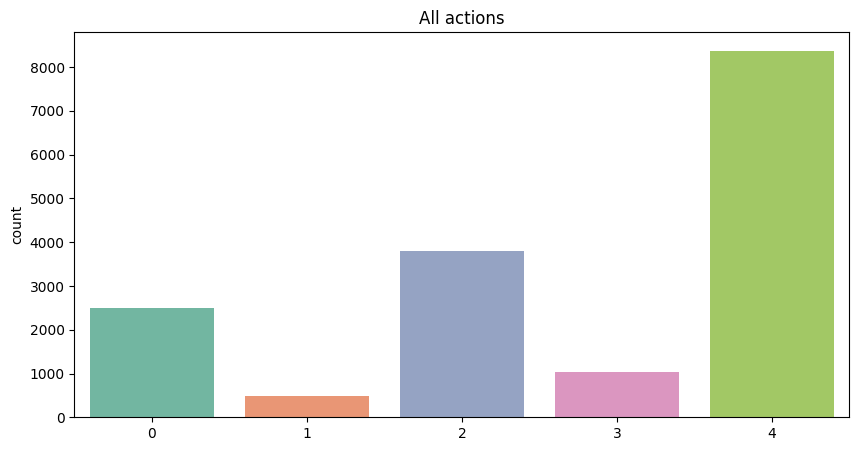

In [103]:
# Draw a freq chart for all actions, different colors for each action
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x=all_actions, palette="Set2")
plt.title('All actions')
plt.show()

In [95]:
# from sklearn.metrics import accuracy_score

accuracy_score(org_labels, all_actions)

0.0